# feature analysis result - already exist in the previous result file

We use WL or CCA to do the
1. inter-subject gesture classification
2. Few-shot adaptation

WL로 가자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, random
sys.path.append('../../Shared')
import processing, Model, Visualization, modules, Adaptation
from sklearn.model_selection import train_test_split



def import_data(subject, current_rep, db_name, feat_idx):
    path = f'C:/Users/hml76/Desktop/UMN/Research/5th Federated Prototype Learning/Dataset/{db_name}/'

    x_train = np.array(pd.read_csv(path + 'Sub{}/Sub{}_Rep{}_data.csv'.format(subject, subject, current_rep)))
    y_train = np.array(pd.read_csv(path + 'Sub{}/Sub{}_Rep{}_label.csv'.format(subject, subject, current_rep)))
    indices = np.random.permutation(len(x_train)) #shuffle
    x_train, y_train = x_train[indices], y_train[indices]

    x_train = x_train.reshape(len(x_train), 12, 11)
    x_train = x_train[:, :, feat_idx]
    x_train = x_train.reshape(len(x_train), 12, 1)

    return x_train, y_train

def ready_data_per_subject_all_reps(subject, Data, downsample, downsample_size, feat_idx):
    X, y = [], []
    for rep in range(1,7):
        X_tmp, y_tmp = import_data(subject, rep, Data, feat_idx)

        X.append(X_tmp)
        y.append(y_tmp)
    X = np.concatenate(X, axis=0)
    y = np.concatenate(y, axis=0)
    y = np.array([np.argmax(y[i]) for i in range(len(y))])

    if downsample:
        idx = np.random.choice(X.shape[0], size=downsample_size, replace=False)
        X, y = X[idx], y[idx]

    return X, y

In [2]:
sub_lst = random.sample(range(1, 41), 20)
#sub_lst
sub_lst = [35, 28, 26, 23, 6, 15, 33, 39, 4, 14, 3, 16, 29, 17, 13, 9, 20, 38, 11, 25]

# Baseline - LOSO

Random 10 subjects

Testing subject 35


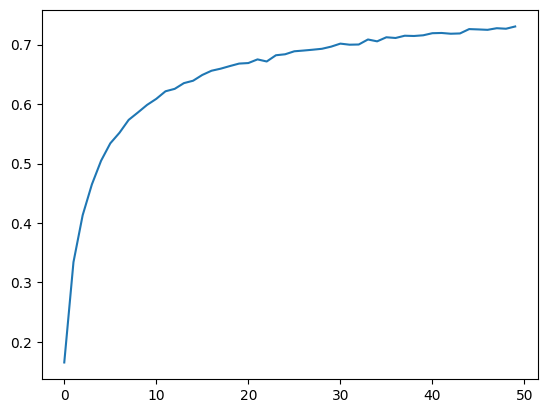

	 Testing subject 28 : acc 2.19%
	 Testing subject 26 : acc 1.47%
	 Testing subject 23 : acc 2.44%
	 Testing subject 6 : acc 1.55%
	 Testing subject 15 : acc 4.75%
	 Testing subject 33 : acc 3.02%
	 Testing subject 39 : acc 2.03%
	 Testing subject 4 : acc 3.12%
	 Testing subject 14 : acc 0.60%
	 Testing subject 3 : acc 1.56%
	 Testing subject 16 : acc 0.34%
	 Testing subject 29 : acc 4.05%
	 Testing subject 17 : acc 0.65%
	 Testing subject 13 : acc 0.44%
	 Testing subject 9 : acc 1.57%
	 Testing subject 20 : acc 2.05%
	 Testing subject 38 : acc 2.21%
	 Testing subject 11 : acc 2.42%
	 Testing subject 25 : acc 2.09%
Testing subject 28


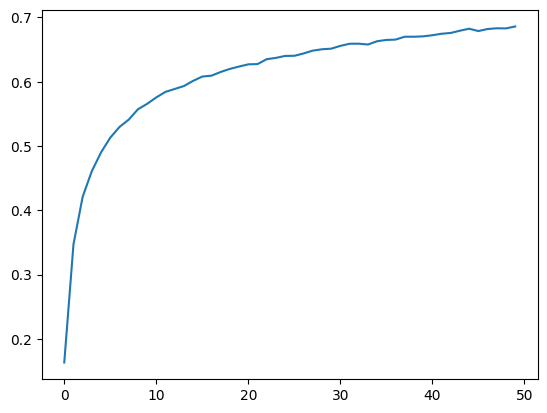

	 Testing subject 35 : acc 2.98%
	 Testing subject 26 : acc 2.60%
	 Testing subject 23 : acc 2.25%
	 Testing subject 6 : acc 3.47%
	 Testing subject 15 : acc 1.74%
	 Testing subject 33 : acc 4.90%
	 Testing subject 39 : acc 2.46%
	 Testing subject 4 : acc 2.13%
	 Testing subject 14 : acc 1.76%
	 Testing subject 3 : acc 2.96%
	 Testing subject 16 : acc 2.15%
	 Testing subject 29 : acc 2.19%
	 Testing subject 17 : acc 2.32%
	 Testing subject 13 : acc 2.14%
	 Testing subject 9 : acc 1.67%
	 Testing subject 20 : acc 1.58%
	 Testing subject 38 : acc 0.93%
	 Testing subject 11 : acc 2.80%
	 Testing subject 25 : acc 1.62%
Testing subject 26


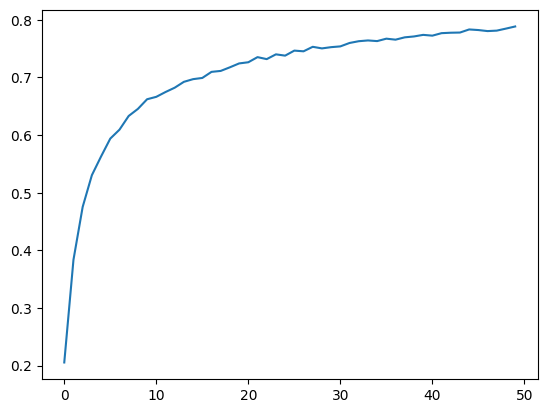

	 Testing subject 35 : acc 2.01%
	 Testing subject 28 : acc 1.94%
	 Testing subject 23 : acc 1.56%
	 Testing subject 6 : acc 2.12%
	 Testing subject 15 : acc 2.15%
	 Testing subject 33 : acc 4.19%
	 Testing subject 39 : acc 1.99%
	 Testing subject 4 : acc 2.18%
	 Testing subject 14 : acc 2.58%
	 Testing subject 3 : acc 2.85%
	 Testing subject 16 : acc 0.98%
	 Testing subject 29 : acc 2.31%
	 Testing subject 17 : acc 1.93%
	 Testing subject 13 : acc 1.85%
	 Testing subject 9 : acc 1.94%
	 Testing subject 20 : acc 1.07%
	 Testing subject 38 : acc 1.92%
	 Testing subject 11 : acc 1.92%
	 Testing subject 25 : acc 1.90%
Testing subject 23


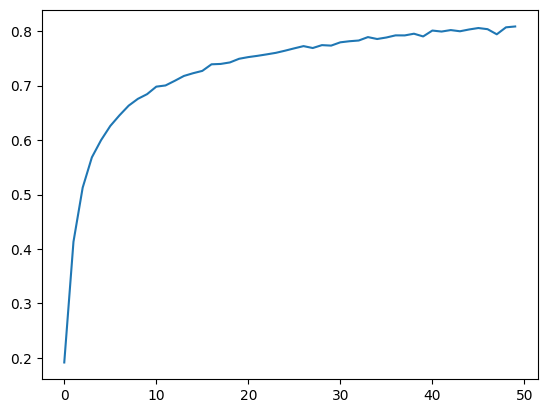

	 Testing subject 35 : acc 2.40%
	 Testing subject 28 : acc 2.18%
	 Testing subject 26 : acc 2.16%
	 Testing subject 6 : acc 2.00%
	 Testing subject 15 : acc 0.99%
	 Testing subject 33 : acc 1.91%
	 Testing subject 39 : acc 2.04%
	 Testing subject 4 : acc 1.85%
	 Testing subject 14 : acc 2.20%
	 Testing subject 3 : acc 2.17%
	 Testing subject 16 : acc 2.00%
	 Testing subject 29 : acc 2.24%
	 Testing subject 17 : acc 2.13%
	 Testing subject 13 : acc 1.46%
	 Testing subject 9 : acc 2.40%
	 Testing subject 20 : acc 1.61%
	 Testing subject 38 : acc 2.03%
	 Testing subject 11 : acc 1.89%
	 Testing subject 25 : acc 1.97%
Testing subject 6


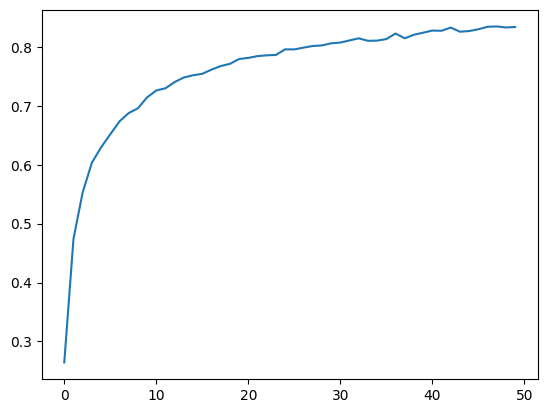

	 Testing subject 35 : acc 2.57%
	 Testing subject 28 : acc 2.14%
	 Testing subject 26 : acc 2.72%
	 Testing subject 23 : acc 1.96%
	 Testing subject 15 : acc 2.04%
	 Testing subject 33 : acc 3.54%
	 Testing subject 39 : acc 1.96%
	 Testing subject 4 : acc 1.13%
	 Testing subject 14 : acc 2.35%
	 Testing subject 3 : acc 2.36%
	 Testing subject 16 : acc 3.19%
	 Testing subject 29 : acc 2.96%
	 Testing subject 17 : acc 3.01%
	 Testing subject 13 : acc 2.31%
	 Testing subject 9 : acc 2.36%
	 Testing subject 20 : acc 3.29%
	 Testing subject 38 : acc 2.58%
	 Testing subject 11 : acc 1.71%
	 Testing subject 25 : acc 5.15%
Testing subject 15


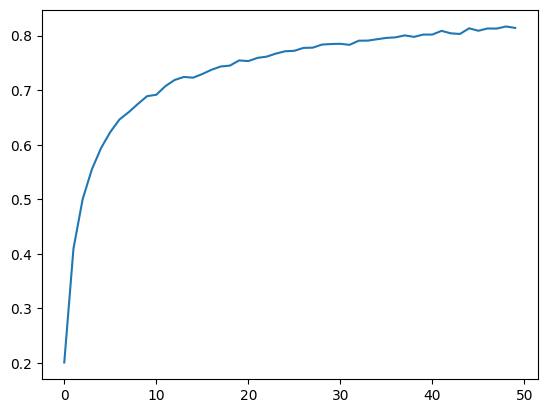

	 Testing subject 35 : acc 3.36%
	 Testing subject 28 : acc 1.54%
	 Testing subject 26 : acc 2.21%
	 Testing subject 23 : acc 2.74%
	 Testing subject 6 : acc 3.29%
	 Testing subject 33 : acc 3.44%
	 Testing subject 39 : acc 0.97%
	 Testing subject 4 : acc 2.62%
	 Testing subject 14 : acc 1.72%
	 Testing subject 3 : acc 3.66%
	 Testing subject 16 : acc 1.65%
	 Testing subject 29 : acc 2.36%
	 Testing subject 17 : acc 1.75%
	 Testing subject 13 : acc 3.54%
	 Testing subject 9 : acc 2.07%
	 Testing subject 20 : acc 2.66%
	 Testing subject 38 : acc 1.97%
	 Testing subject 11 : acc 2.43%
	 Testing subject 25 : acc 3.52%
Testing subject 33


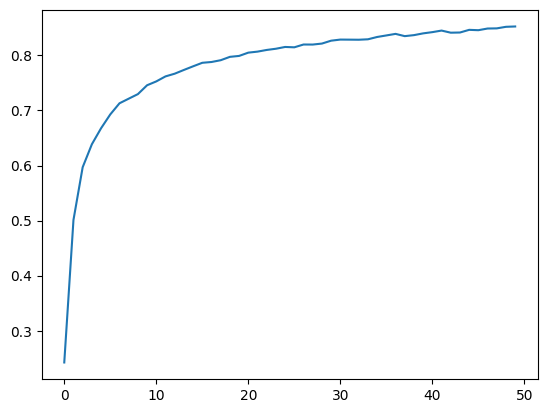

	 Testing subject 35 : acc 3.02%
	 Testing subject 28 : acc 1.81%
	 Testing subject 26 : acc 2.67%
	 Testing subject 23 : acc 3.05%
	 Testing subject 6 : acc 3.49%
	 Testing subject 15 : acc 4.42%
	 Testing subject 39 : acc 2.50%
	 Testing subject 4 : acc 2.10%
	 Testing subject 14 : acc 2.39%
	 Testing subject 3 : acc 3.51%
	 Testing subject 16 : acc 1.93%
	 Testing subject 29 : acc 4.04%
	 Testing subject 17 : acc 2.50%
	 Testing subject 13 : acc 0.75%
	 Testing subject 9 : acc 3.70%
	 Testing subject 20 : acc 2.96%
	 Testing subject 38 : acc 3.55%
	 Testing subject 11 : acc 2.54%
	 Testing subject 25 : acc 2.19%
Testing subject 39


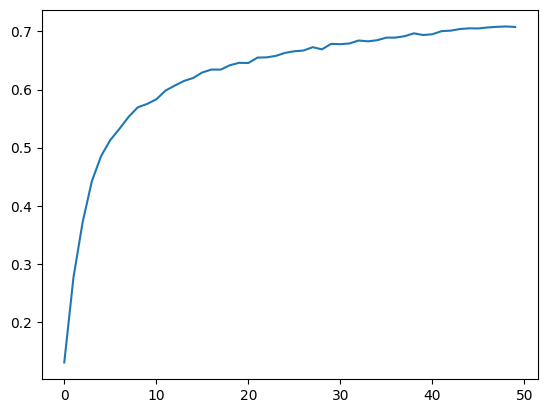

	 Testing subject 35 : acc 3.35%
	 Testing subject 28 : acc 4.85%
	 Testing subject 26 : acc 4.39%
	 Testing subject 23 : acc 4.99%
	 Testing subject 6 : acc 4.91%
	 Testing subject 15 : acc 3.84%
	 Testing subject 33 : acc 4.82%
	 Testing subject 4 : acc 3.31%
	 Testing subject 14 : acc 2.78%
	 Testing subject 3 : acc 4.72%
	 Testing subject 16 : acc 1.30%
	 Testing subject 29 : acc 4.83%
	 Testing subject 17 : acc 2.64%
	 Testing subject 13 : acc 2.32%
	 Testing subject 9 : acc 4.88%
	 Testing subject 20 : acc 2.65%
	 Testing subject 38 : acc 3.36%
	 Testing subject 11 : acc 1.94%
	 Testing subject 25 : acc 6.05%
Testing subject 4


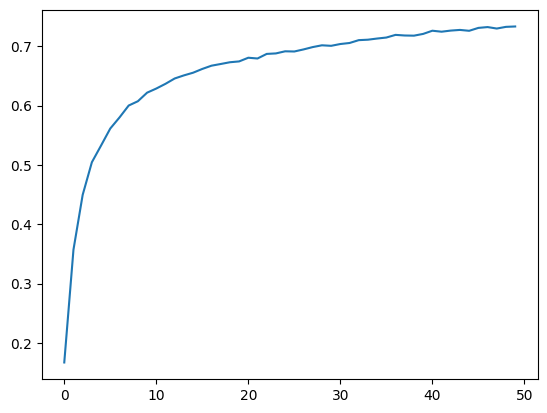

	 Testing subject 35 : acc 2.15%
	 Testing subject 28 : acc 2.51%
	 Testing subject 26 : acc 1.98%
	 Testing subject 23 : acc 2.13%
	 Testing subject 6 : acc 1.98%
	 Testing subject 15 : acc 3.99%
	 Testing subject 33 : acc 4.48%
	 Testing subject 39 : acc 1.91%
	 Testing subject 14 : acc 2.66%
	 Testing subject 3 : acc 3.59%
	 Testing subject 16 : acc 2.27%
	 Testing subject 29 : acc 0.91%
	 Testing subject 17 : acc 1.69%
	 Testing subject 13 : acc 2.92%
	 Testing subject 9 : acc 1.90%
	 Testing subject 20 : acc 2.11%
	 Testing subject 38 : acc 2.31%
	 Testing subject 11 : acc 2.43%
	 Testing subject 25 : acc 3.09%
Testing subject 14


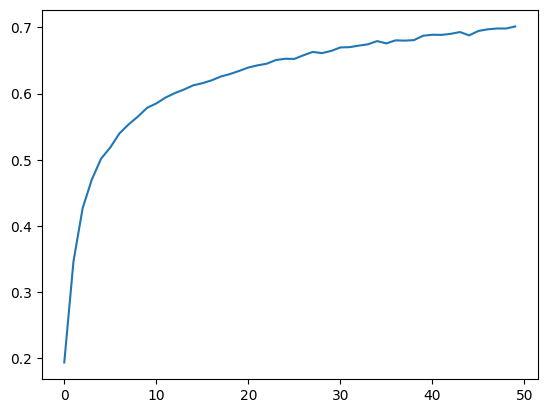

	 Testing subject 35 : acc 4.73%
	 Testing subject 28 : acc 2.43%
	 Testing subject 26 : acc 2.04%
	 Testing subject 23 : acc 2.22%
	 Testing subject 6 : acc 2.01%
	 Testing subject 15 : acc 1.62%
	 Testing subject 33 : acc 3.06%
	 Testing subject 39 : acc 2.58%
	 Testing subject 4 : acc 2.28%
	 Testing subject 3 : acc 5.44%
	 Testing subject 16 : acc 1.86%
	 Testing subject 29 : acc 4.45%
	 Testing subject 17 : acc 2.75%
	 Testing subject 13 : acc 1.64%
	 Testing subject 9 : acc 2.40%
	 Testing subject 20 : acc 1.83%
	 Testing subject 38 : acc 2.13%
	 Testing subject 11 : acc 2.37%
	 Testing subject 25 : acc 3.00%
Testing subject 3


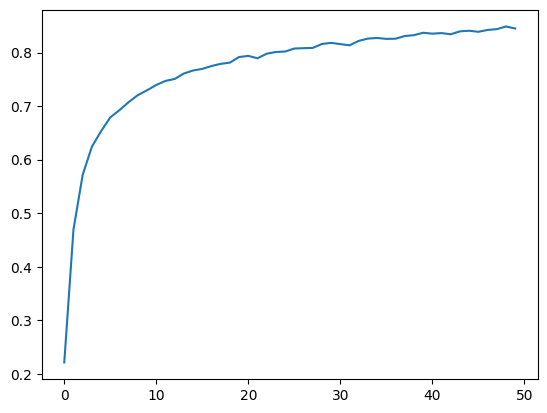

	 Testing subject 35 : acc 3.29%
	 Testing subject 28 : acc 2.37%
	 Testing subject 26 : acc 2.10%
	 Testing subject 23 : acc 2.35%
	 Testing subject 6 : acc 2.49%
	 Testing subject 15 : acc 2.50%
	 Testing subject 33 : acc 2.89%
	 Testing subject 39 : acc 1.93%
	 Testing subject 4 : acc 1.75%
	 Testing subject 14 : acc 2.47%
	 Testing subject 16 : acc 1.70%
	 Testing subject 29 : acc 1.94%
	 Testing subject 17 : acc 1.38%
	 Testing subject 13 : acc 2.16%
	 Testing subject 9 : acc 1.32%
	 Testing subject 20 : acc 3.14%
	 Testing subject 38 : acc 1.62%
	 Testing subject 11 : acc 3.18%
	 Testing subject 25 : acc 2.95%
Testing subject 16


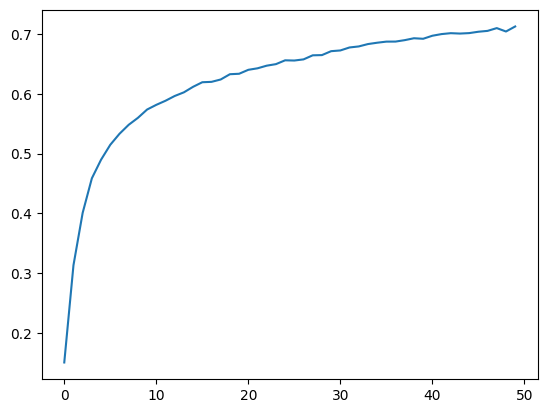

	 Testing subject 35 : acc 2.44%
	 Testing subject 28 : acc 1.87%
	 Testing subject 26 : acc 1.96%
	 Testing subject 23 : acc 2.38%
	 Testing subject 6 : acc 2.13%
	 Testing subject 15 : acc 2.29%
	 Testing subject 33 : acc 2.05%
	 Testing subject 39 : acc 3.01%
	 Testing subject 4 : acc 2.22%
	 Testing subject 14 : acc 2.03%
	 Testing subject 3 : acc 2.66%
	 Testing subject 29 : acc 2.41%
	 Testing subject 17 : acc 3.46%
	 Testing subject 13 : acc 2.08%
	 Testing subject 9 : acc 3.43%
	 Testing subject 20 : acc 2.42%
	 Testing subject 38 : acc 3.31%
	 Testing subject 11 : acc 2.50%
	 Testing subject 25 : acc 2.18%
Testing subject 29


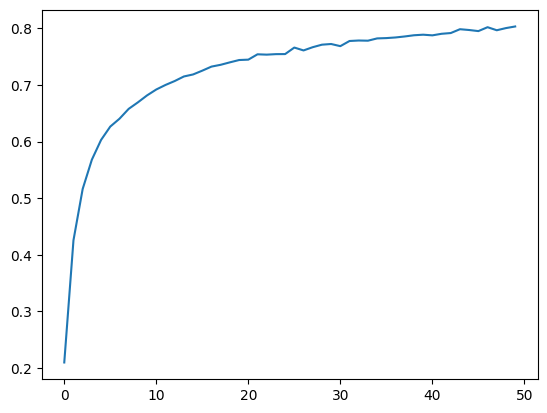

	 Testing subject 35 : acc 1.87%
	 Testing subject 28 : acc 1.80%
	 Testing subject 26 : acc 2.00%
	 Testing subject 23 : acc 2.36%
	 Testing subject 6 : acc 1.59%
	 Testing subject 15 : acc 2.99%
	 Testing subject 33 : acc 2.89%
	 Testing subject 39 : acc 1.81%
	 Testing subject 4 : acc 2.95%
	 Testing subject 14 : acc 2.19%
	 Testing subject 3 : acc 1.81%
	 Testing subject 16 : acc 2.94%
	 Testing subject 17 : acc 1.86%
	 Testing subject 13 : acc 3.55%
	 Testing subject 9 : acc 1.39%
	 Testing subject 20 : acc 1.80%
	 Testing subject 38 : acc 1.84%
	 Testing subject 11 : acc 1.81%
	 Testing subject 25 : acc 2.28%
Testing subject 17


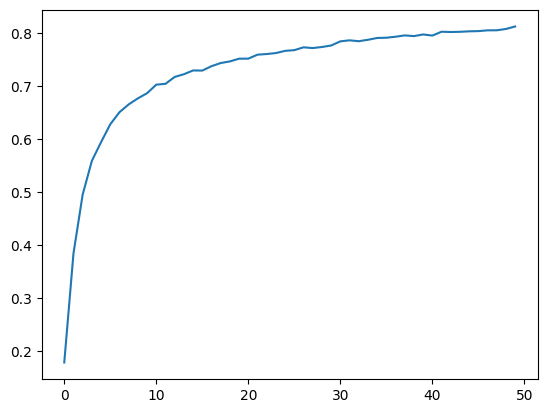

	 Testing subject 35 : acc 1.36%
	 Testing subject 28 : acc 2.09%
	 Testing subject 26 : acc 1.31%
	 Testing subject 23 : acc 1.68%
	 Testing subject 6 : acc 2.06%
	 Testing subject 15 : acc 2.48%
	 Testing subject 33 : acc 3.80%
	 Testing subject 39 : acc 1.30%
	 Testing subject 4 : acc 2.25%
	 Testing subject 14 : acc 2.36%
	 Testing subject 3 : acc 3.02%
	 Testing subject 16 : acc 1.79%
	 Testing subject 29 : acc 1.65%
	 Testing subject 13 : acc 2.70%
	 Testing subject 9 : acc 3.92%
	 Testing subject 20 : acc 2.06%
	 Testing subject 38 : acc 2.79%
	 Testing subject 11 : acc 2.11%
	 Testing subject 25 : acc 4.10%
Testing subject 13


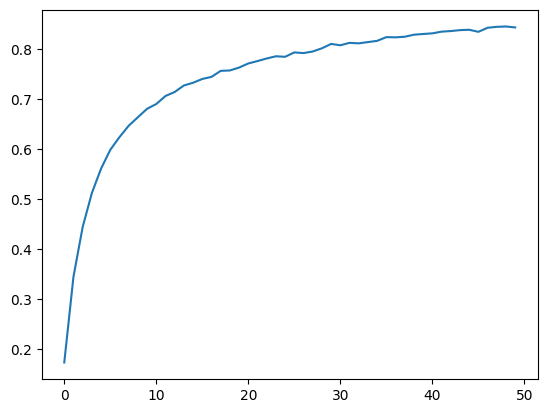

	 Testing subject 35 : acc 2.05%
	 Testing subject 28 : acc 1.77%
	 Testing subject 26 : acc 1.97%
	 Testing subject 23 : acc 1.59%
	 Testing subject 6 : acc 2.18%
	 Testing subject 15 : acc 2.54%
	 Testing subject 33 : acc 3.46%
	 Testing subject 39 : acc 2.40%
	 Testing subject 4 : acc 2.36%
	 Testing subject 14 : acc 2.88%
	 Testing subject 3 : acc 2.04%
	 Testing subject 16 : acc 2.17%
	 Testing subject 29 : acc 1.62%
	 Testing subject 17 : acc 2.24%
	 Testing subject 9 : acc 2.06%
	 Testing subject 20 : acc 1.48%
	 Testing subject 38 : acc 1.48%
	 Testing subject 11 : acc 2.07%
	 Testing subject 25 : acc 2.73%
Testing subject 9


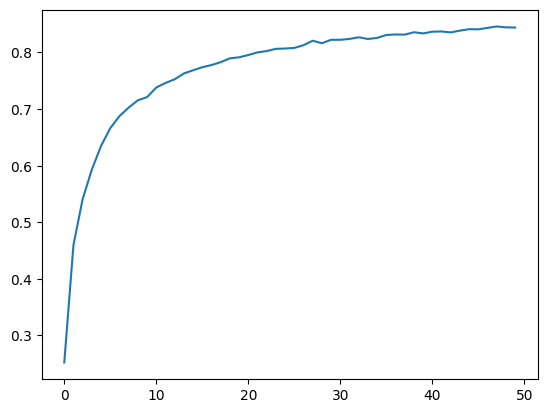

	 Testing subject 35 : acc 3.59%
	 Testing subject 28 : acc 3.26%
	 Testing subject 26 : acc 3.43%
	 Testing subject 23 : acc 3.37%
	 Testing subject 6 : acc 4.71%
	 Testing subject 15 : acc 5.09%
	 Testing subject 33 : acc 5.24%
	 Testing subject 39 : acc 2.91%
	 Testing subject 4 : acc 3.18%
	 Testing subject 14 : acc 3.38%
	 Testing subject 3 : acc 3.28%
	 Testing subject 16 : acc 3.88%
	 Testing subject 29 : acc 5.38%
	 Testing subject 17 : acc 2.86%
	 Testing subject 13 : acc 4.13%
	 Testing subject 20 : acc 2.66%
	 Testing subject 38 : acc 3.67%
	 Testing subject 11 : acc 3.10%
	 Testing subject 25 : acc 4.40%
Testing subject 20


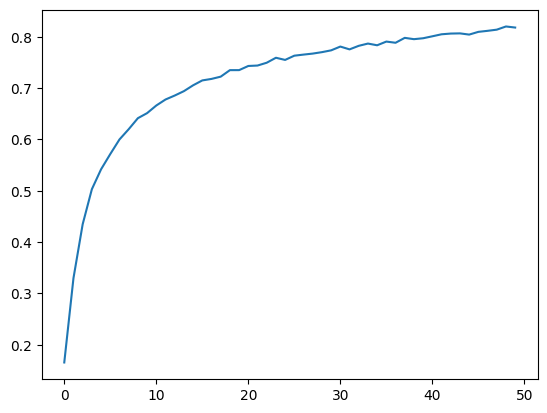

	 Testing subject 35 : acc 2.78%
	 Testing subject 28 : acc 2.13%
	 Testing subject 26 : acc 3.76%
	 Testing subject 23 : acc 2.50%
	 Testing subject 6 : acc 2.18%
	 Testing subject 15 : acc 3.54%
	 Testing subject 33 : acc 2.66%
	 Testing subject 39 : acc 2.91%
	 Testing subject 4 : acc 2.79%
	 Testing subject 14 : acc 2.00%
	 Testing subject 3 : acc 3.78%
	 Testing subject 16 : acc 2.24%
	 Testing subject 29 : acc 3.37%
	 Testing subject 17 : acc 2.63%
	 Testing subject 13 : acc 2.38%
	 Testing subject 9 : acc 3.79%
	 Testing subject 38 : acc 2.68%
	 Testing subject 11 : acc 2.99%
	 Testing subject 25 : acc 2.38%
Testing subject 38


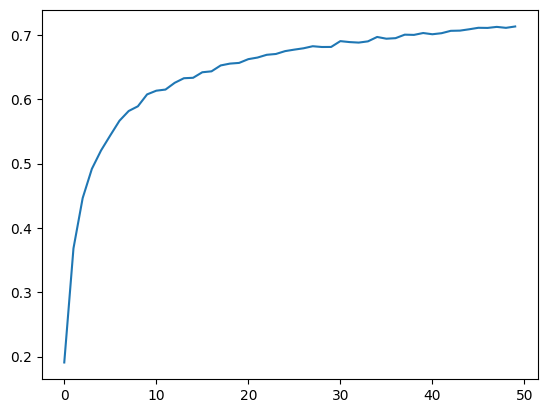

	 Testing subject 35 : acc 3.59%
	 Testing subject 28 : acc 2.14%
	 Testing subject 26 : acc 1.96%
	 Testing subject 23 : acc 2.93%
	 Testing subject 6 : acc 2.84%
	 Testing subject 15 : acc 4.04%
	 Testing subject 33 : acc 4.27%
	 Testing subject 39 : acc 2.48%
	 Testing subject 4 : acc 3.30%
	 Testing subject 14 : acc 1.01%
	 Testing subject 3 : acc 3.43%
	 Testing subject 16 : acc 1.18%
	 Testing subject 29 : acc 3.21%
	 Testing subject 17 : acc 2.13%
	 Testing subject 13 : acc 3.54%
	 Testing subject 9 : acc 3.27%
	 Testing subject 20 : acc 2.75%
	 Testing subject 11 : acc 1.85%
	 Testing subject 25 : acc 2.03%
Testing subject 11


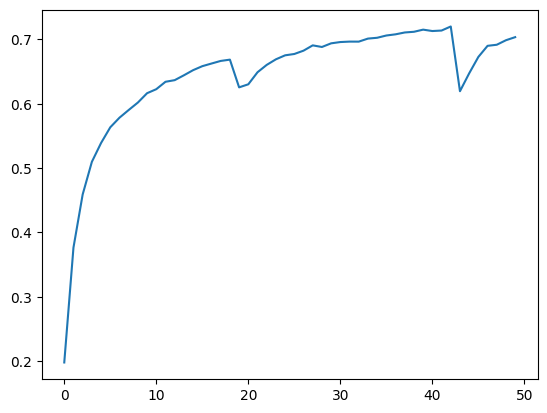

	 Testing subject 35 : acc 1.91%
	 Testing subject 28 : acc 2.18%
	 Testing subject 26 : acc 2.33%
	 Testing subject 23 : acc 2.39%
	 Testing subject 6 : acc 1.74%
	 Testing subject 15 : acc 2.60%
	 Testing subject 33 : acc 2.57%
	 Testing subject 39 : acc 3.25%
	 Testing subject 4 : acc 2.01%
	 Testing subject 14 : acc 2.05%
	 Testing subject 3 : acc 1.91%
	 Testing subject 16 : acc 0.49%
	 Testing subject 29 : acc 2.84%
	 Testing subject 17 : acc 2.18%
	 Testing subject 13 : acc 0.80%
	 Testing subject 9 : acc 1.96%
	 Testing subject 20 : acc 1.86%
	 Testing subject 38 : acc 2.45%
	 Testing subject 25 : acc 2.27%
Testing subject 25


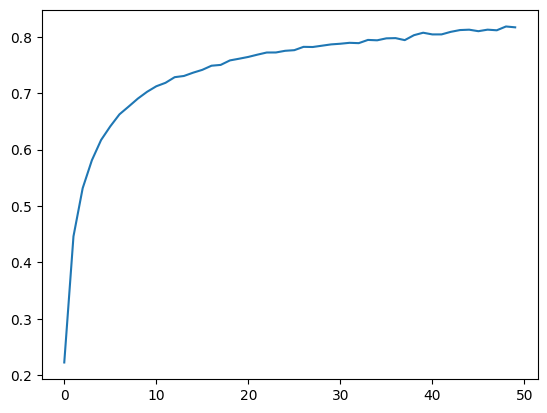

	 Testing subject 35 : acc 2.67%
	 Testing subject 28 : acc 2.45%
	 Testing subject 26 : acc 2.75%
	 Testing subject 23 : acc 2.96%
	 Testing subject 6 : acc 3.80%
	 Testing subject 15 : acc 5.30%
	 Testing subject 33 : acc 2.66%
	 Testing subject 39 : acc 2.49%
	 Testing subject 4 : acc 3.61%
	 Testing subject 14 : acc 4.06%
	 Testing subject 3 : acc 3.76%
	 Testing subject 16 : acc 1.45%
	 Testing subject 29 : acc 2.69%
	 Testing subject 17 : acc 2.59%
	 Testing subject 13 : acc 2.52%
	 Testing subject 9 : acc 4.41%
	 Testing subject 20 : acc 3.10%
	 Testing subject 38 : acc 3.31%
	 Testing subject 11 : acc 2.08%


In [5]:
Data_name = "DB2"
F = 0

Sub_all = []

for train_subject in sub_lst:
    print(f"Testing subject {train_subject}")
    X_train, y_train = ready_data_per_subject_all_reps(subject=train_subject, Data=Data_name, downsample=True, downsample_size=25000, feat_idx=F)

    #model = Model.build_model_deep_1D(num_classes=len(np.unique(y_train)))
    model = Model.build_model_1D(input_shape=X_train.shape[1:], num_classes=len(np.unique(y_train)))
    history = model.fit(X_train, y_train, epochs=50, batch_size=256, verbose=0)
    plt.plot(history.history['accuracy'])
    plt.show()

    Sub_acc = []
    for test_subject in sub_lst:
        if test_subject != train_subject:
            X_test, y_test = ready_data_per_subject_all_reps(subject=test_subject, Data=Data_name, downsample=True, downsample_size=10000, feat_idx=F)
            loss, acc = model.evaluate(X_test, y_test, verbose=0)
            print(f"\t Testing subject {test_subject} : acc {acc*100:.2f}%")
            Sub_acc.append(acc)
        else:
            continue
    Sub_all.append(Sub_acc)

In [6]:
Sub_all

[[0.021900000050663948,
  0.014700000174343586,
  0.024399999529123306,
  0.01549999974668026,
  0.04749999940395355,
  0.03020000085234642,
  0.0203000009059906,
  0.031199999153614044,
  0.006000000052154064,
  0.015599999576807022,
  0.0034000000450760126,
  0.04050000011920929,
  0.006500000134110451,
  0.004399999976158142,
  0.015699999406933784,
  0.020500000566244125,
  0.022099999710917473,
  0.02419999986886978,
  0.020899999886751175],
 [0.02979999966919422,
  0.026000000536441803,
  0.02250000089406967,
  0.034699998795986176,
  0.017400000244379044,
  0.04899999871850014,
  0.02459999918937683,
  0.021299999207258224,
  0.01759999990463257,
  0.029600000008940697,
  0.0215000007301569,
  0.021900000050663948,
  0.02319999970495701,
  0.021400000900030136,
  0.016699999570846558,
  0.015799999237060547,
  0.00930000003427267,
  0.02800000086426735,
  0.016200000420212746],
 [0.020099999383091927,
  0.01940000057220459,
  0.015599999576807022,
  0.021199999377131462,
  0.021

In [7]:
baseline = pd.DataFrame(Sub_all)
baseline.shape

(20, 19)

In [8]:
baseline.to_csv('./DB2_baseline_v2.csv', index=False)

# Inter-subject incremental

In [3]:
Data_name = "DB2"
F = 0
Sub_all = []

for test_subject in sub_lst:
    print(f"Testing subject {test_subject}")
    X_test, y_test = ready_data_per_subject_all_reps(subject=test_subject, Data=Data_name, downsample=True, downsample_size=10000, feat_idx=F)

    Sub_acc, X_train, y_train = [], [], []
    for train_subject in sub_lst:
        if train_subject != test_subject:
            X_train_tmp, y_train_tmp = ready_data_per_subject_all_reps(subject=train_subject, Data=Data_name, downsample=True, downsample_size=25000, feat_idx=F)
            X_train.append(X_train_tmp)
            y_train.append(y_train_tmp)

            X_train_arr, y_train_arr = np.concatenate(X_train, axis=0), np.concatenate(y_train, axis=0)
            print("\t", X_train_arr.shape, y_train_arr.shape)

            #model = Model.build_model_deep_1D(num_classes=len(np.unique(y_train_arr)))
            model = Model.build_model_1D(input_shape=X_train_arr.shape[1:], num_classes=len(np.unique(y_train_arr)))
            model.fit(X_train_arr, y_train_arr, epochs=50, batch_size=256, verbose=0)
            loss, acc = model.evaluate(X_test, y_test, verbose=0)
            print(f"\t Added subject {train_subject} : acc {acc*100:.2f}%")
            Sub_acc.append(acc)

    Sub_all.append(Sub_acc)

Testing subject 35
	 (25000, 12, 1) (25000,)
	 Added subject 28 : acc 2.37%
	 (50000, 12, 1) (50000,)
	 Added subject 26 : acc 2.17%
	 (75000, 12, 1) (75000,)
	 Added subject 23 : acc 2.13%
	 (100000, 12, 1) (100000,)
	 Added subject 6 : acc 3.18%
	 (125000, 12, 1) (125000,)
	 Added subject 15 : acc 1.62%
	 (150000, 12, 1) (150000,)
	 Added subject 33 : acc 1.73%
	 (175000, 12, 1) (175000,)
	 Added subject 39 : acc 1.90%
	 (200000, 12, 1) (200000,)
	 Added subject 4 : acc 1.73%
	 (225000, 12, 1) (225000,)
	 Added subject 14 : acc 2.01%
	 (250000, 12, 1) (250000,)
	 Added subject 3 : acc 1.73%
	 (275000, 12, 1) (275000,)
	 Added subject 16 : acc 2.23%
	 (300000, 12, 1) (300000,)
	 Added subject 29 : acc 1.47%
	 (325000, 12, 1) (325000,)
	 Added subject 17 : acc 2.37%
	 (350000, 12, 1) (350000,)
	 Added subject 13 : acc 1.94%
	 (375000, 12, 1) (375000,)
	 Added subject 9 : acc 2.38%
	 (400000, 12, 1) (400000,)
	 Added subject 20 : acc 2.00%
	 (425000, 12, 1) (425000,)
	 Added subject 38 

In [4]:
acccc = pd.DataFrame(Sub_all)
acccc.to_csv('./DB2_inter_sub_accumulate.csv', index=False)
acccc.shape

(20, 19)

# Few-shot adaptation